# ***Forward Stepwise Regression***

Installing the necessary packages

In [ ]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_c

In [ ]:
!pip install l0bnb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for l0bnb: filename=l0bnb-1.0.0-py3-none-any.whl size=22298 sha256=1a18a5ed99c53a20750ad849ac1f8fe9ecce0c7edfc101752495df2b6846b697
  Stored in directory: /root/.cache/pip/wheels/db/c7/a3/a2e42159dcc85eeb004a84772e1884c45f88d43fac0075de19
Successfully built l0bnb


Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd

from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
from statsmodels.api import OLS

import sklearn.model_selection as skm
import sklearn.linear_model as skl

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from functools import partial

from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

from ISLP.models import ModelSpec as MS

In [ ]:
from ISLP import load_data

In [ ]:
from l0bnb import fit_path

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

from ISLP.models import (Stepwise, sklearn_selected, sklearn_selection_path)

Calling the inbuilt "Hitters" dataset.

About: This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University. This is part of the data that was used in the 1988 ASA Graphics Section Poster Session. The salary data were originally from Sports Illustrated, April 20, 1987. The 1986 and career statistics were obtained from The 1987 Baseball Encyclopedia Update published by Collier Books, Macmillan Publishing Company, New York.

A data frame with 322 observations of major league players on the following 20 variables.

* AtBat Number of times at bat in 1986

* Hits Number of hits in 1986

* HmRun Number of home runs in 1986

* Runs Number of runs in 1986

* RBI Number of runs batted in in 1986

* Walks Number of walks in 1986

* Years Number of years in the major leagues

* CAtBat Number of times at bat during his career

* CHits Number of hits during his career

* CHmRun Number of home runs during his career

* CRuns Number of runs during his career

* CRBI Number of runs batted in during his career

* CWalks Number of walks during his career

* League A factor with levels A and N indicating player’s league at the end of 1986

* Division A factor with levels E and W indicating player’s division at the end of 1986

* PutOuts Number of put outs in 1986

* Assists Number of assists in 1986

* Errors Number of errors in 1986

* Salary 1987 annual salary on opening day in thousands of dollars

* NewLeague A factor with levels A and N indicating player’s league at the beginning of 1987

In [ ]:
Hitters = load_data('Hitters')
Hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [ ]:
Hitters.shape

(322, 20)

In [ ]:
np.isnan(Hitters['Salary']).sum()

59

We have 59 null values

In [ ]:
Hitters = Hitters.dropna()
Hitters.shape

(263, 20)

In [ ]:
def nCp(sigma2, estimator, X, Y):
  """Negative Cp statistic"""
  n,p=X.shape
  Yhat=estimator.predict(X)
  RSS=np.sum((Y-Yhat)**2)
  return -(RSS+2*p*sigma2)/n

In [ ]:
design = MS(Hitters.columns.drop('Salary')).fit(Hitters)
Y = np.array(Hitters['Salary'])
X = design.transform(Hitters)
sigma2 = OLS(Y, X).fit().scale

In [ ]:
neg_Cp = partial(nCp, sigma2)

We use stepwise regression here. We opt for forward stepwise regression.

In [ ]:
strategy = Stepwise.first_peak(design, direction='forward', max_terms=len(design.terms))

hitters_MSE = sklearn_selected(OLS, strategy)
hitters_MSE.fit(Hitters, Y)
hitters_MSE.selected_state_

('Assists',
 'AtBat',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRBI',
 'CRuns',
 'CWalks',
 'Division',
 'Errors',
 'Hits',
 'HmRun',
 'League',
 'NewLeague',
 'PutOuts',
 'RBI',
 'Runs',
 'Walks',
 'Years')

In [ ]:
sklearn_selected(OLS, strategy, scoring=neg_Cp)

hitters_Cp = sklearn_selected(OLS, strategy, scoring=neg_Cp)
hitters_Cp.fit(Hitters, Y)
hitters_Cp.selected_state_

('Assists',
 'AtBat',
 'CAtBat',
 'CRBI',
 'CRuns',
 'CWalks',
 'Division',
 'Hits',
 'PutOuts',
 'Walks')

## ***Cross-Validation***

In [ ]:
# Impute missing values in the target variable 'Salary' in the 'Hitters' DataFrame
Hitters['Salary'].fillna(Hitters['Salary'].mean(), inplace=True)

# Extract the target variable after imputation
Y = Hitters['Salary']

# Now fit the model
strategy = Stepwise.fixed_steps(design, len(design.terms), direction='forward')
full_path = sklearn_selection_path(OLS, strategy)
full_path.fit(Hitters, Y)

We replace the null values by their respective means.

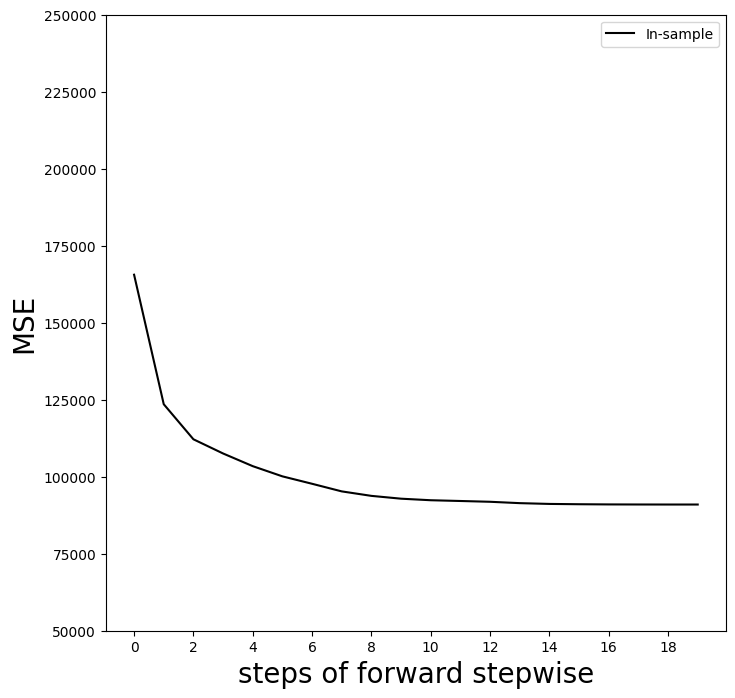

In [ ]:
Yhat_in = full_path.predict(Hitters)
mse_fig, ax = plt.subplots(figsize=(8, 8))
# Convert Pandas Series 'Y' to a NumPy array before applying multi-dimensional indexing
insample_mse = ((Yhat_in - np.array(Y)[:, None]) ** 2).mean(0)
n_steps = insample_mse.shape[0]
ax.plot(np.arange(n_steps), insample_mse, 'k', label='In-sample')
ax.set_ylabel('MSE', fontsize=20)
ax.set_xlabel('steps of forward stepwise', fontsize=20)
ax.set_xticks(np.arange(n_steps)[::2])
ax.legend()
ax.set_ylim([50000, 250000])
K = 5
kfold = skm.KFold(K, random_state=0, shuffle=True)

The above is the graph which shows the reduction in the mean square error as the steps in forward stepwise increases.

In [ ]:
Yhat_cv = skm.cross_val_predict(full_path, Hitters, Y, cv=kfold)
Yhat_cv.shape

(322, 20)

In [ ]:
cv_mse = []
for train_idx, test_idx in kfold.split(Y):
  errors = (Yhat_cv[test_idx] - np.array(Y)[test_idx, None]) ** 2
  cv_mse.append(errors.mean(axis=0))
cv_mse = np.array(cv_mse).T
print(cv_mse.shape)

(20, 5)


In [ ]:
ax.errorbar(np.arange(n_steps), cv_mse.mean(1), cv_mse.std(1) / np.sqrt(K), label='Cross-validated', c='r')
validation = skm.ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_idx, test_idx in validation.split(Y):
  full_path.fit(Hitters.iloc[train_idx], Y[train_idx])
  Yhat_val = full_path.predict(Hitters.iloc[test_idx])
  errors = (Yhat_val - np.array(Y)[test_idx,None]) ** 2
  validation_mse = errors.mean(axis=0)
  ax.plot(np.arange(n_steps), validation_mse, 'b--', label='Validation')
  ax.set_xticks(np.arange(n_steps)[::2])
  ax.set_ylim([50000,250000])
  ax.legend()
  mse_fig
  plt.show()